In [1]:
import pandas as pd
import numpy as np
import sklearn as skl
from matplotlib import pyplot as plt

In [2]:
import seaborn as sns
%matplotlib inline

In [3]:
# load df from csv
df = pd.read_csv('athlete_events.csv').drop('ID', axis=1)
nocdf = pd.read_csv('noc_regions.csv')

In [4]:
df.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
# printing columns with missing values: 
df.isnull().any()

Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
dtype: bool

In [6]:
df.isnull().sum()

Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [7]:
# Listing out columns with nan values
null_cols = ['Age', 'Height', 'Weight', 'Medal']

# now, get a count of nan values in the above colums
df[null_cols].isnull().sum()

Age         9474
Height     60171
Weight     62875
Medal     231333
dtype: int64

In [8]:
# starting with age. since it's a number, let's describe it
df['Age'].describe()

count    261642.000000
mean         25.556898
std           6.393561
min          10.000000
25%          21.000000
50%          24.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64

In [64]:
# We see the mean age of an athelete is 25.5 whereas the median is 24.
# One thing we can have a look at is how it has changed over the years & Seasons. 
# Another question to ask is as the sports differ in the two seasons, does the 
# mean/median age of participating players change as well?
def group_by_time(column):
    by_season = df.groupby(['Season', 'Sex'])[column].agg(['mean', 'median'])
    by_year = df.groupby(['Year', 'Sex'])[column].agg(['mean', 'median'])
    by_year_n_season = df.groupby(['Year', 'Season', 'Sex'])[column].agg(['mean', 'median'])
    return by_season, by_year, by_year_n_season

age_by_season, age_by_year, age_by_year_n_season = group_by_time('Age')

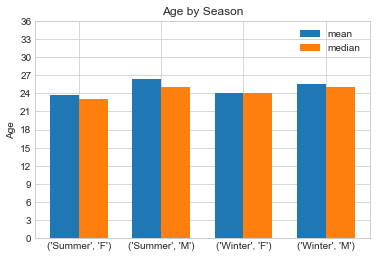

In [65]:
plt.style.use('seaborn-whitegrid')

def plot_bar(df, **kargs):
    import math
    y_max = math.ceil(max(df.apply(max)))
    y_max = math.ceil(max(y_max * 1.15, y_max + 10))
    y_step = y_max//10
    
    ylabel = kargs['ylabel'] if 'ylabel' in kargs else 'Age'
    title = kargs['title'] if 'title' in kargs else 'Age by Season'
    
    bar_width = kargs['bar_width'] if 'bar_width' in kargs else 0.35
    index = np.arange(len(df.index))
    plt.bar(index, df['mean'], bar_width, label='mean')
    plt.bar(index + bar_width, df['median'], bar_width, label='median')
    # sns.countplot(data=age_by_season, x='Season', hue='median')

    plt.ylabel(ylabel)
    plt.title(title)

    plt.xticks(index + bar_width / 2, df.index)
    plt.yticks(range(0, y_max, y_step),range(0, y_max, y_step))
    plt.legend(loc='best')
    plt.show()
    
plot_bar(age_by_season)

In [67]:
age_by_year.head()

mean  median
Year Sex                   
1896 M    23.331579    23.0
1900 F    29.030303    27.0
     M    28.189700    27.0
1904 F    45.312500    49.5
     M    25.891051    24.0

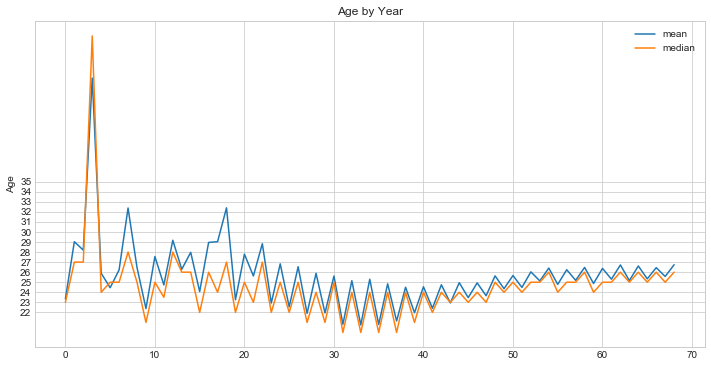

In [68]:
plt.figure(figsize=(12, 6))
def plot_line(df, **kwargs):
    yrange = kwargs['yticks'] if 'yticks' in kwargs else range(22, 36)
    xrange = kwargs['xticks'] if 'xticks' in kwargs else None
    ylabel = kwargs['ylabel'] if 'ylabel' in kwargs else 'Age'
    xlabel = kwargs['xlabel'] if 'xlabel' in kwargs else ''
    title  = kwargs['title'] if 'title' in kwargs else 'Age by Year'
    
    plt.plot(df.index, df['mean'], label='mean')
    plt.plot(df.index, df['median'], label='median')

    plt.yticks(yrange, yrange)
    if xrange is not None:
        plt.xticks(ays.index)

    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.legend(loc='best')
    plt.show()
    
plot_line(age_by_year.reset_index())

In [71]:
ays.head()

,Year,Season,Sex,mean,median
0,1896,Summer,M,23.331579,23.0
1,1900,Summer,F,29.030303,27.0
2,1900,Summer,M,28.189700,27.0
3,1904,Summer,F,45.312500,49.5
4,1904,Summer,M,25.891051,24.0


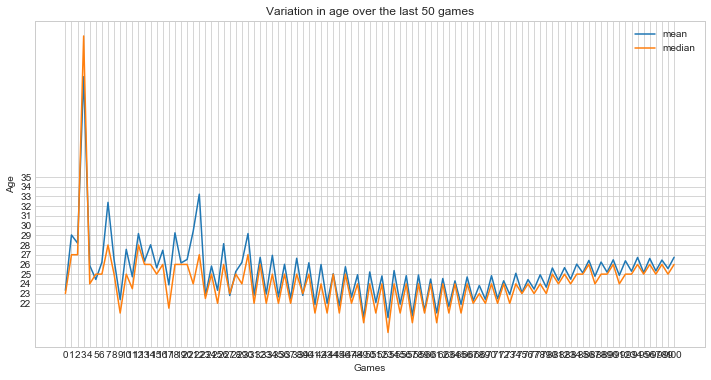

In [76]:
plt.figure(figsize=(12, 6))

ays = age_by_year_n_season.reset_index()
plot_line(ays, xlabel='Games', 
          xticks=ays.index, 
          title='Variation in age over the last 50 games',
          yrange=range(max(ays['mean'].astype(int).max(), ays['median'].astype(int).max()) + 5)
         )


# plt.plot(ays.index, ays['mean'], label='mean')
# plt.plot(ays.index, ays['median'], label='median')

# plt.xticks(ays.index)
# plt.yticks(np.arange(22.5, 34.5, 0.5), np.arange(22.5, 34.5, 0.5))

# plt.ylabel('Age')
# plt.xlabel('Games')
# plt.title('Age grouped by Games')
# plt.legend(loc='best')
# plt.show()

In [77]:
plt.figure(figsize=(20, 10))

plot_bar(age_by_year_n_season.reset_index().drop(['Year', 'Season'], axis=1), title="Variation in age over the last 50 games")

TypeError: '>' not supported between instances of 'float' and 'str'

<Figure size 1440x720 with 0 Axes>

In [14]:
# from the three graphs, we can say that the season of the game has not had much effect on the average/median age of 
# atheletes in the games with the difference drawing closer still as the games progress to the later years of 2000. 
# Since, this is the case, we can keep it simple and replace the missing values in age with median age value per year
# of the games.
def fill_na_of_df(column, by=age_by_year, mean_or_median='median'):
    null_idx = df[df[column].isnull()].index
    fill_val = df[df.index.isin(null_idx)]['Year'].apply(
        lambda x: age_by_year.loc[int(x)][mean_or_median]
    )
    df.loc[null_idx, column] = fill_val
    
    


In [15]:
fill_na_of_df('Age', age_by_year, 'median')
display(df.describe())
df.isna().any()

,Age,Height,Weight,Year
count,271116.000000,210945.000000,208241.000000,271116.000000
mean,25.563098,175.338970,70.702393,1978.378480
std,6.286083,10.518462,14.348020,29.877632
min,10.000000,127.000000,25.000000,1896.000000
25%,22.000000,168.000000,60.000000,1960.000000
50%,25.000000,175.000000,70.000000,1988.000000
75%,28.000000,183.000000,79.000000,2002.000000
max,97.000000,226.000000,214.000000,2016.000000


Name      False
Sex       False
Age       False
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
dtype: bool

In [16]:
grouped = {
    'height': group_by_time('Height'),
    'weight': group_by_time('Weight')
}

In [17]:
season, year, year_n_season = grouped['height']

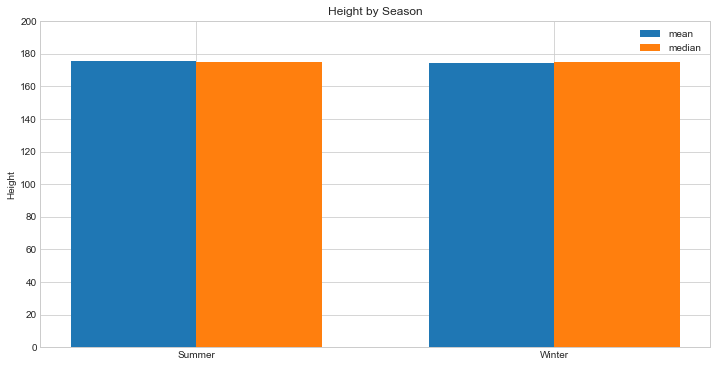

In [18]:
plt.figure(figsize=(12, 6))
plot_bar(season, ylabel='Height', title='Height by Season')

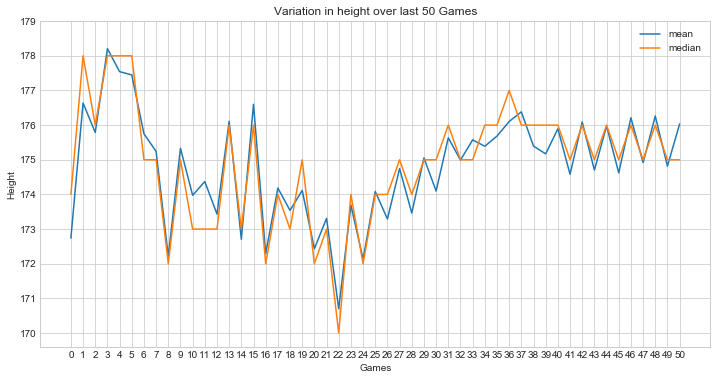

In [19]:
plt.figure(figsize=(12, 6))
plot_line(year_n_season.reset_index(), yticks=range(170, 180), xticks=range(0, 51), ylabel='Height', xlabel='Games', title='Variation in height over last 50 Games')

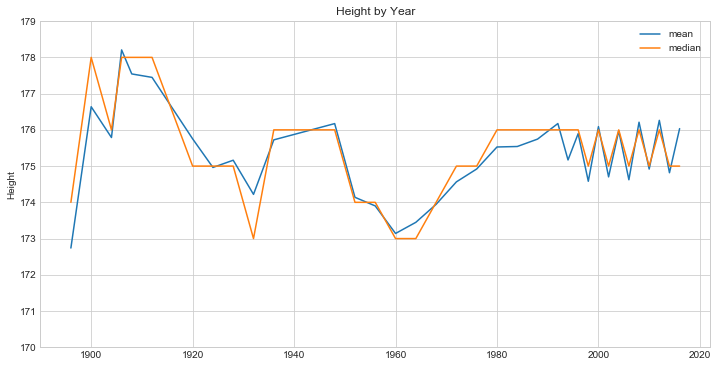

In [20]:
plt.figure(figsize=(12, 6))
plot_line(year, yticks=range(170, 180), ylabel='Height', title='Height by Year')

In [21]:
fill_na_of_df('Height', year, 'median')
display(df.describe())
df.isna().any()

,Age,Height,Weight,Year
count,271116.000000,271116.000000,208241.000000,271116.000000
mean,25.563098,142.067141,70.702393,1978.378480
std,6.286083,62.987038,14.348020,29.877632
min,10.000000,23.000000,25.000000,1896.000000
25%,22.000000,157.000000,60.000000,1960.000000
50%,25.000000,171.000000,70.000000,1988.000000
75%,28.000000,180.000000,79.000000,2002.000000
max,97.000000,226.000000,214.000000,2016.000000


Name      False
Sex       False
Age       False
Height    False
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
dtype: bool

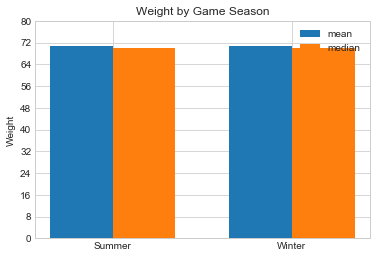

In [22]:
season, year, year_n_season = grouped['weight']
plot_bar(season, ylabel='Weight', title='Weight by Game Season')

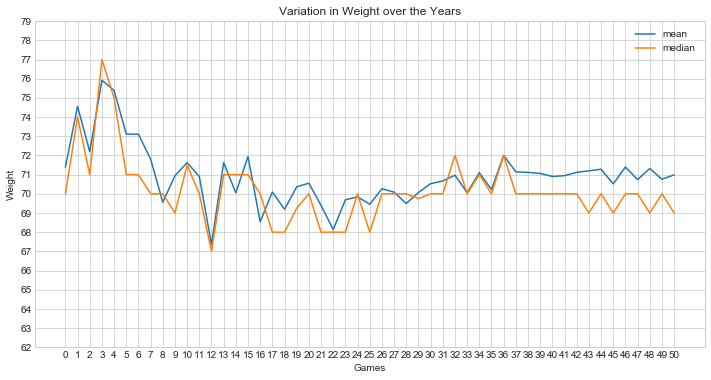

In [23]:
plt.figure(figsize=(12, 6))
plot_line(year_n_season.reset_index(), yticks=range(62, 80), xticks=range(0, 51), ylabel='Weight', xlabel='Games', title='Variation in Weight over the Years')

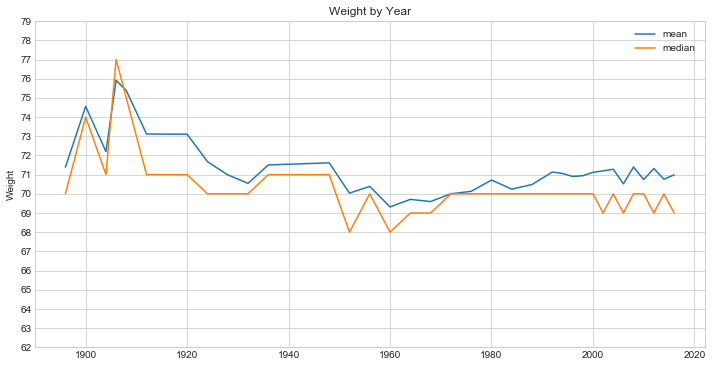

In [24]:
plt.figure(figsize=(12, 6))
plot_line(year, yticks=range(62, 80), ylabel='Weight', title='Weight by Year')

In [25]:
fill_na_of_df('Weight', year, 'median')
df.describe()

,Age,Height,Weight,Year
count,271116.000000,271116.000000,271116.000000,271116.000000
mean,25.563098,142.067141,60.207974,1978.378480
std,6.286083,62.987038,22.874519,29.877632
min,10.000000,23.000000,23.000000,1896.000000
25%,22.000000,157.000000,47.000000,1960.000000
50%,25.000000,171.000000,64.000000,1988.000000
75%,28.000000,180.000000,75.000000,2002.000000
max,97.000000,226.000000,214.000000,2016.000000


In [26]:
df.Medal.describe(include=['O'])

count     39783
unique        3
top        Gold
freq      13372
Name: Medal, dtype: object

In [27]:
df.Medal.value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [28]:
df["Medal"] = df["Medal"].fillna('No Medal')

In [29]:
df.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal
2,Gunnar Nielsen Aaby,M,24.0,28.0,28.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal
3,Edgar Lindenau Aabye,M,34.0,27.0,27.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal


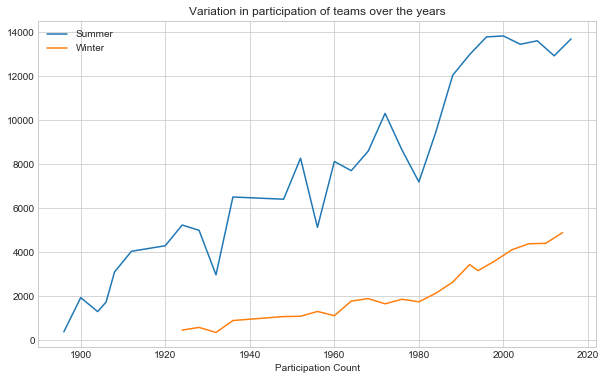

In [30]:
# Summer and Winter game participation over the years
plt.figure(figsize=(10, 6))

participation_df = df.groupby(['Year', 'Season']).NOC.count().reset_index().rename({'NOC': 'Count'})
summer_participation_df = participation_df[participation_df.Season == 'Summer']
winter_participation_df = participation_df[participation_df.Season == 'Winter']
plt.plot(summer_participation_df.Year, summer_participation_df.NOC, label='Summer')
plt.plot(winter_participation_df.Year, winter_participation_df.NOC, label='Winter')

plt.xlabel('Participation Count')
plt.title('Variation in participation of teams over the years')
plt.legend(loc='best')
plt.show()

In [31]:
df['Victory'] = df.Medal.apply(lambda x: int(x != "No Medal"))

In [32]:
# Number of games won by each country: 
victory_df = df.groupby(['Year', 'Season', 'NOC'])['Victory'].sum().astype(int).reset_index()
victory_df['Participation'] = df.groupby(['Year', 'Season', 'NOC'])['Victory'].count().reset_index()['Victory']
victory_df.head()

,Year,Season,NOC,Victory,Participation
0,1896,Summer,AUS,3,5
1,1896,Summer,AUT,5,8
2,1896,Summer,DEN,6,15
3,1896,Summer,FRA,11,26
4,1896,Summer,GBR,9,25


In [33]:
all_games = {key: val for val, key in enumerate(victory_df.groupby(['Year', 'Season']).count().index)}

In [34]:
seasonal_games = {
    season: {
        year: val for val, year in enumerate(
            victory_df[
                victory_df.Season == season
            ].sort_values(
                by='Year',
                ascending=True
            )['Year'].unique()
        )
    } for season in df.Season.unique()
}




In [35]:
victory_df['Game#'] = victory_df[["Year", "Season"]].apply(lambda x: all_games[(int(x[0]), x[1])], axis=1)

# games grouped by season as well
victory_df['SeasonalGame#'] = victory_df[["Year", "Season"]].apply(lambda x: seasonal_games[x[1]][x[0]], axis=1)

In [36]:

# victory_df.drop(['Year', 'Season'], axis=1, inplace=True)
victory_df.head()

,Year,Season,NOC,Victory,Participation,Game#,SeasonalGame#
0,1896,Summer,AUS,3,5,0,0
1,1896,Summer,AUT,5,8,0,0
2,1896,Summer,DEN,6,15,0,0
3,1896,Summer,FRA,11,26,0,0
4,1896,Summer,GBR,9,25,0,0


In [37]:
per_game_victory = victory_df.groupby(['NOC', 'Game#'])['Victory'].sum().reset_index()
per_game_victory.head()

,NOC,Game#,Victory
0,AFG,13,0
1,AFG,15,0
2,AFG,19,0
3,AFG,21,0
4,AFG,23,0


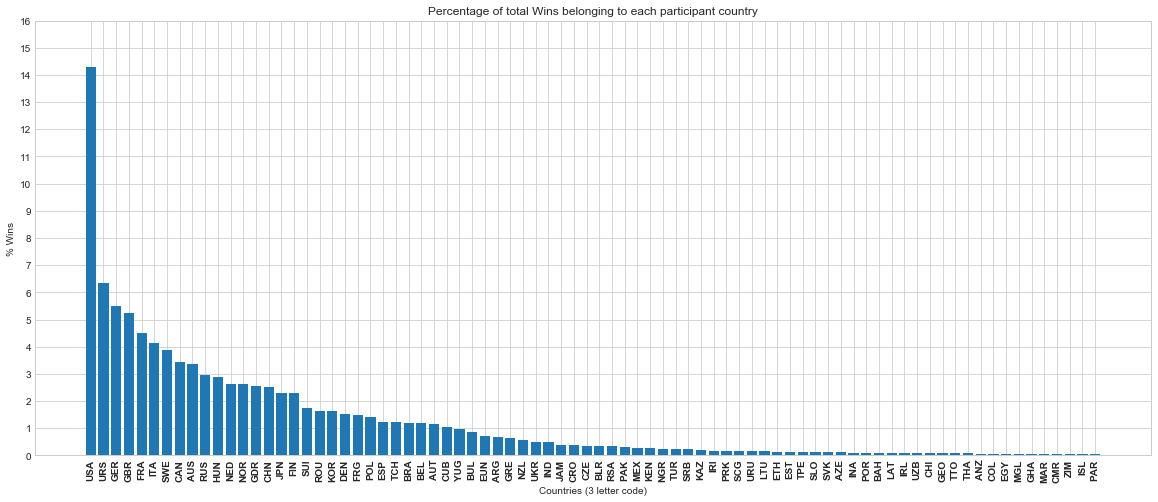

In [38]:
# Most significant countries in the games
plt.figure(figsize=(20, 8))
most_wins = per_game_victory.groupby('NOC')['Victory'].sum().sort_values(ascending=False).reset_index()[:80]
total_victories = most_wins.Victory.sum()

most_wins['VictoryPercent'] = most_wins['Victory'].apply(lambda x: round(x * 100.0/total_victories, 2))

y_range = list(range(0, 17, 1))
plt.bar(most_wins.NOC, most_wins.VictoryPercent)

plt.ylabel("% Wins")
plt.xlabel("Countries (3 letter code)")
plt.title("Percentage of total Wins belonging to each participant country")

plt.yticks(y_range, y_range)
plt.xticks(rotation="vertical", fontweight='bold')
plt.show()

In [39]:
# MSC are the ones with winning percent greater than 1.5%
msc = most_wins[most_wins.VictoryPercent > 1.5].NOC
len(msc)

21

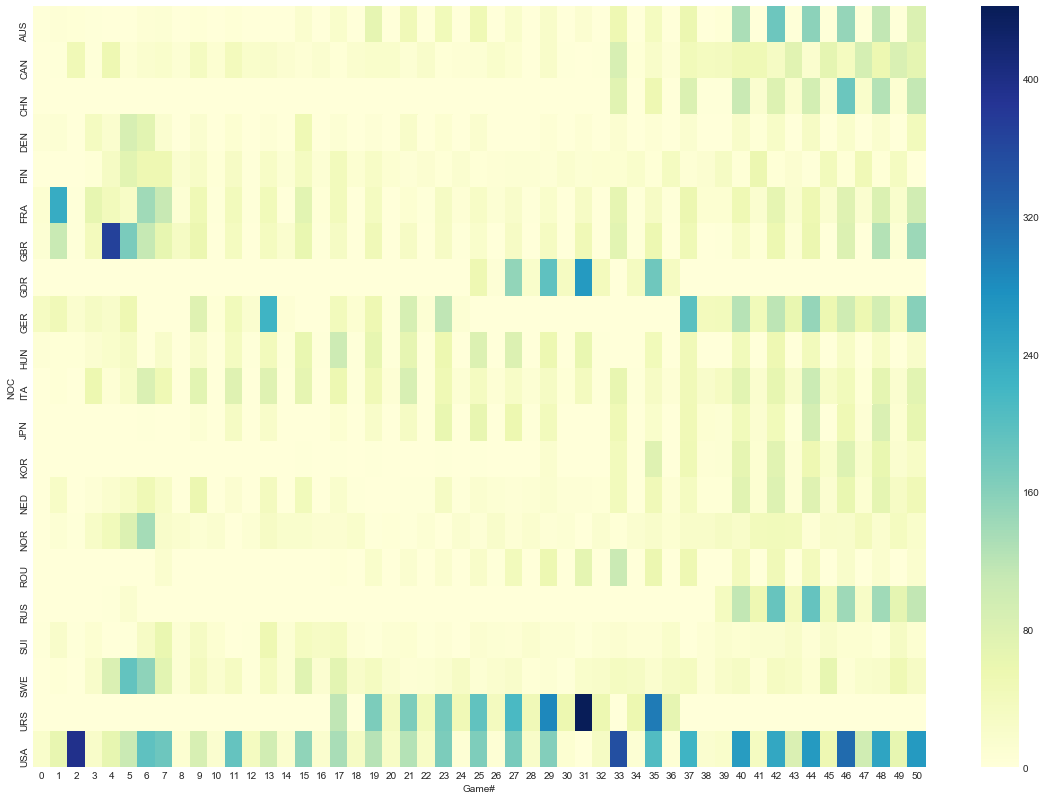

In [40]:
plt.figure(figsize=(20, 14))
temp = victory_df[victory_df.NOC.isin(msc)].pivot(index='NOC', columns='Game#', values='Victory').fillna(0).astype(int)

# sns.heatmap(temp, cmap="YlGnBu")
sns.heatmap(temp, cmap="YlGnBu")

# display(temp.columns)
# plt.imshow(temp)
# for country in msc:
#     temp = victory_df[victory_df.NOC == country]
#     plt.scatter(temp['Game#'], temp['Victory'], label=country)

# plt.yticks(temp.index)

# plt.legend(loc='best')
# plt.show()

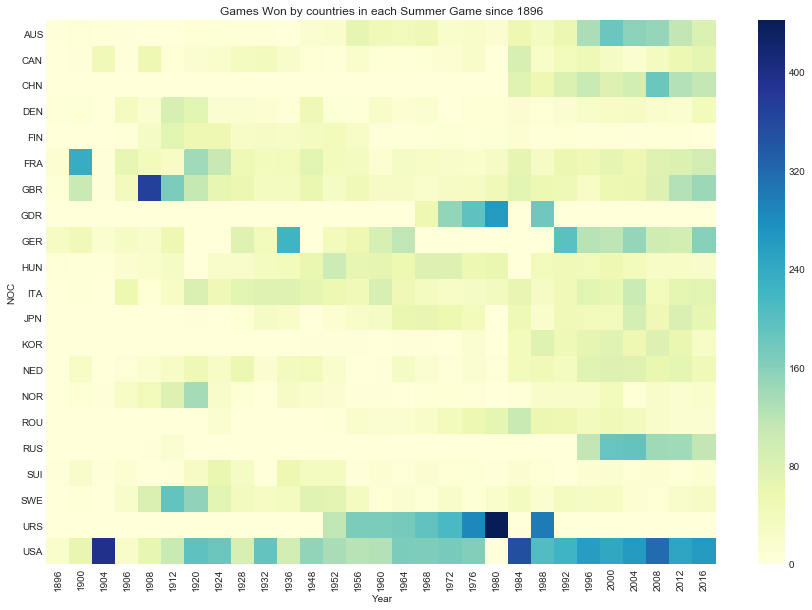

In [41]:
# Summer games
def plot_heatmap_summer(vdf, value_col='Victory'):
    plt.figure(figsize=(15, 10))
    temp = vdf[
        vdf.NOC.isin(msc) & (vdf.Season == 'Summer')
    ].pivot(index='NOC', columns='Year', values=value_col).fillna(0).astype(int)

    # sns.heatmap(temp, cmap="YlGnBu")
    sns.heatmap(temp, cmap="YlGnBu")
    plt.yticks(rotation='horizontal')
    plt.xticks(rotation='vertical')
    plt.title("Games Won by countries in each Summer Game since 1896")
    plt.show()
    
plot_heatmap_summer(victory_df)

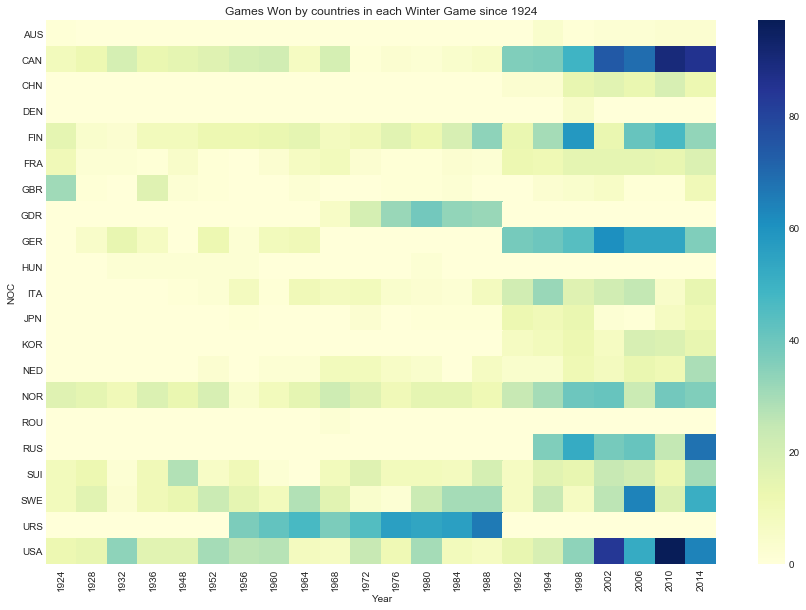

In [42]:
# Winter games
def plot_heatmap_winter(vdf, value_col='Victory'): # please, I beg you :'(
    plt.figure(figsize=(15, 10))
    temp = vdf[
        vdf.NOC.isin(msc) & (vdf.Season == 'Winter')
    ].pivot(index='NOC', columns='Year', values=value_col).fillna(0).astype(int)

    # sns.heatmap(temp, cmap="YlGnBu")
    sns.heatmap(temp, cmap="YlGnBu")
    plt.yticks(rotation='horizontal')
    plt.xticks(rotation='vertical')
    plt.title("Games Won by countries in each Winter Game since 1924")
    plt.show()
    
plot_heatmap_winter(victory_df) # ahh, follow the heat :D

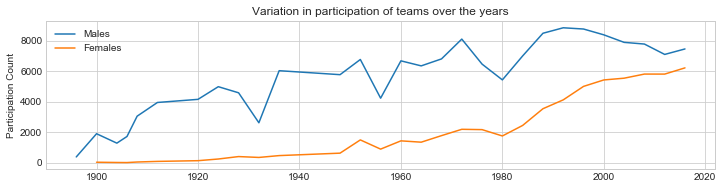

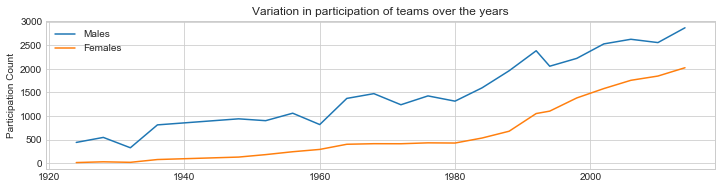

In [43]:
# Gender participation over the years
# Summer and Winter game participation over the years

participation_df = df.groupby(['Year', 'Season', 'Sex']).NOC.count().reset_index().rename({'NOC': 'Count'})

plt.figure(figsize=(12, 6))

# Male & Female athelete participation in Summer over the years
plt.subplot(211)
summer_participation_df = participation_df[participation_df.Season == 'Summer']

male_df = summer_participation_df[summer_participation_df.Sex == 'M']
plt.plot(male_df.Year, male_df.NOC, label='Males')
female_df = summer_participation_df[summer_participation_df.Sex == 'F']
plt.plot(female_df.Year, female_df.NOC, label='Females')

plt.legend(loc="best")
plt.ylabel('Participation Count')
plt.title('Variation in participation of teams over the years')
plt.show()

# Male & Female athelete participation in Winter games over the years
plt.figure(figsize=(12, 6))

plt.subplot(212)
winter_participation_df = participation_df[participation_df.Season == 'Winter']

male_df = winter_participation_df[winter_participation_df.Sex == 'M']
plt.plot(male_df.Year, male_df.NOC, label='Males')
female_df = winter_participation_df[winter_participation_df.Sex == 'F']
plt.plot(female_df.Year, female_df.NOC, label='Females')


plt.legend(loc="best")
plt.ylabel('Participation Count')
plt.title('Variation in participation of teams over the years')
plt.show()

In [44]:
df.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Victory
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,0
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,0
2,Gunnar Nielsen Aaby,M,24.0,28.0,28.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,0
3,Edgar Lindenau Aabye,M,34.0,27.0,27.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,0


In [45]:
len(df.Sport.unique())

66

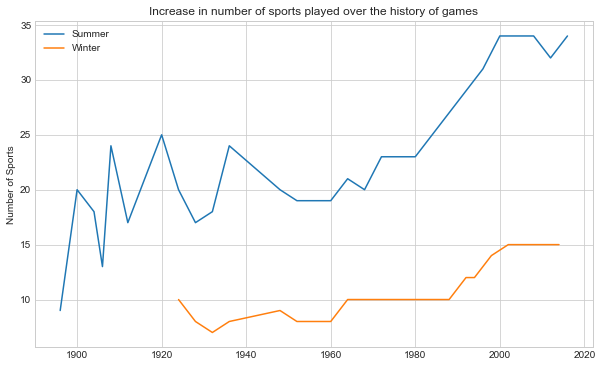

In [46]:
sport_df = df.groupby(['Year', 'Season', 'Sport']).NOC.count().reset_index()
sport_count_df = { 'all': sport_df.groupby(['Year', 'Season']).Sport.count().reset_index() }
sport_count_df['summer'] = sport_count_df['all'][sport_count_df['all']['Season'] == 'Summer']
sport_count_df['winter'] = sport_count_df['all'][sport_count_df['all']['Season'] == 'Winter']

plt.figure(figsize=(10, 6))
plt.plot(sport_count_df['summer']['Year'], sport_count_df['summer']['Sport'], label='Summer')
plt.plot(sport_count_df['winter']['Year'], sport_count_df['winter']['Sport'], label='Winter')

plt.legend(loc='best')
plt.ylabel('Number of Sports')
plt.title('Increase in number of sports played over the history of games')
plt.show()

In [47]:
sport_df.head()

,Year,Season,Sport,NOC
0,1896,Summer,Athletics,106
1,1896,Summer,Cycling,41
2,1896,Summer,Fencing,15
3,1896,Summer,Gymnastics,97
4,1896,Summer,Shooting,65


In [48]:
summer_parti_df = sport_df[sport_df['Season'] == 'Summer'].drop(['Season', 'Year'], axis=1).groupby('Sport').NOC.sum().sort_values(ascending=False).reset_index()
winter_parti_df = sport_df[sport_df['Season'] == 'Winter'].drop(['Season', 'Year'], axis=1).groupby('Sport').NOC.sum().sort_values(ascending=False).reset_index()

summer_parti_df.head()

,Sport,NOC
0,Athletics,38624
1,Gymnastics,26707
2,Swimming,23195
3,Shooting,11448
4,Cycling,10859


In [49]:
popular_summer_sports = list(summer_parti_df[summer_parti_df['NOC'] > 1500].Sport)
popular_winter_sports = list(winter_parti_df[winter_parti_df['NOC'] > 500].Sport)


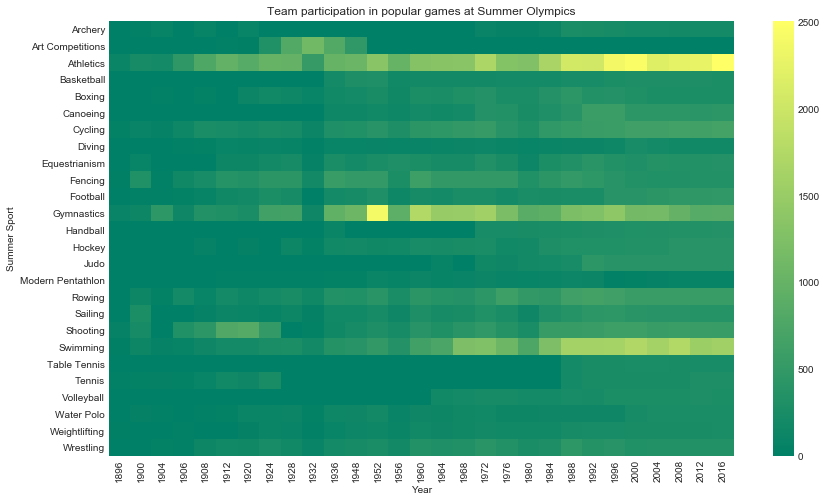

In [50]:
plt.figure(figsize=(14, 8))
sns.heatmap(sport_df[sport_df.Sport.isin(popular_summer_sports)].pivot(
    index="Sport", columns="Year", values="NOC"
).fillna(0).astype(int), cmap="summer")

plt.ylabel("Summer Sport")
plt.title("Team participation in popular games at Summer Olympics")
plt.show()

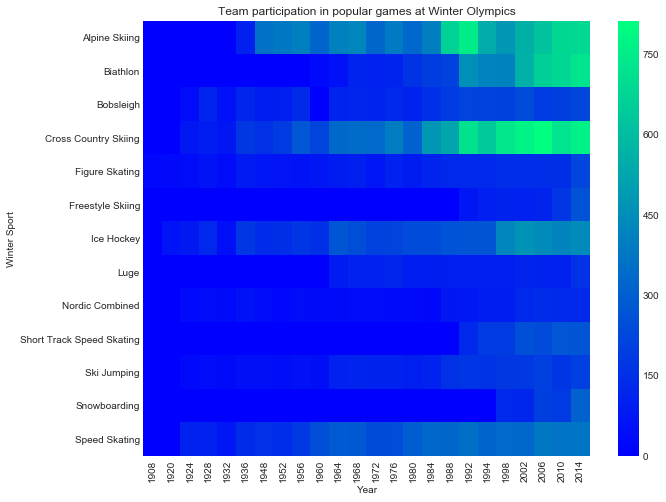

In [51]:
plt.figure(figsize=(10, 8))
sns.heatmap(sport_df[sport_df.Sport.isin(popular_winter_sports)].pivot(
    index="Sport", columns="Year", values="NOC"
).fillna(0).astype(int), cmap="winter")

plt.ylabel("Winter Sport")
plt.title("Team participation in popular games at Winter Olympics")
plt.show()

In [52]:
df.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Victory
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,0
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,0
2,Gunnar Nielsen Aaby,M,24.0,28.0,28.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,0
3,Edgar Lindenau Aabye,M,34.0,27.0,27.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,0


In [53]:
df.drop('Games', axis=1, inplace=True)

In [54]:
df.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal,Victory
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,0
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,0
2,Gunnar Nielsen Aaby,M,24.0,28.0,28.0,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,0
3,Edgar Lindenau Aabye,M,34.0,27.0,27.0,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,0


In [55]:
year_parti_df = sport_df.groupby("Year").NOC.sum()
year_parti_df.head()

Year
1896     380
1900    1936
1904    1301
1906    1733
1908    3101
Name: NOC, dtype: int64

In [56]:
sport_df['Part%'] = sport_df.apply(lambda x: round(x.NOC * 100/year_parti_df[x.Year], 2), axis=1)
sport_df.head()

,Year,Season,Sport,NOC,Part%
0,1896,Summer,Athletics,106,27.89
1,1896,Summer,Cycling,41,10.79
2,1896,Summer,Fencing,15,3.95
3,1896,Summer,Gymnastics,97,25.53
4,1896,Summer,Shooting,65,17.11


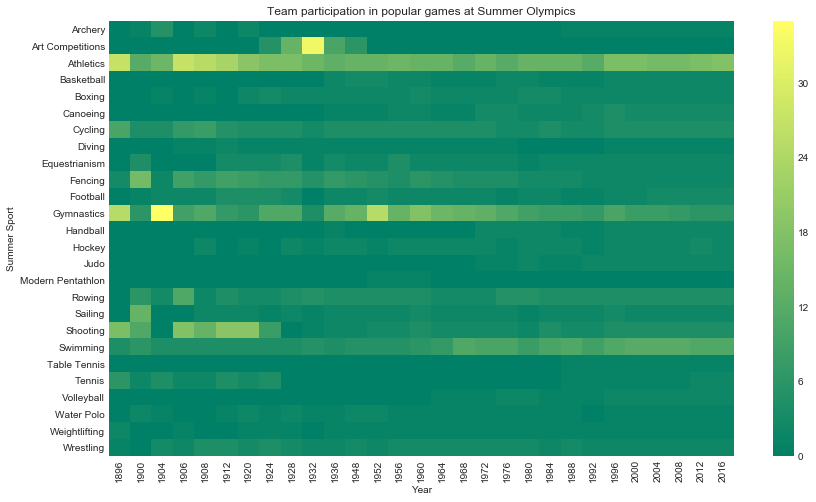

In [57]:
plt.figure(figsize=(14, 8))
sns.heatmap(sport_df[sport_df.Sport.isin(popular_summer_sports)].pivot(
    index="Sport", columns="Year", values="Part%"
).fillna(0).astype(int), cmap="summer")

plt.ylabel("Summer Sport")
plt.title("Team participation in popular games at Summer Olympics")
plt.show()

In [58]:
df.iloc[:100]

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal,Victory
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,0
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,0
2,Gunnar Nielsen Aaby,M,24.0,28.0,28.0,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,0
3,Edgar Lindenau Aabye,M,34.0,27.0,27.0,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,0
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal,0
6,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,No Medal,0
7,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal,0
8,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,No Medal,0
9,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal,0


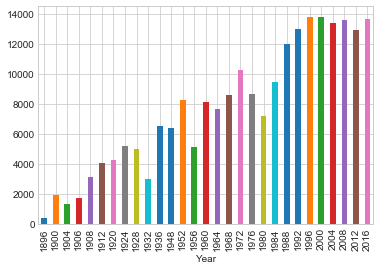

In [59]:
sport_df[sport_df.Season == 'Summer'].groupby("Year")["NOC"].sum().plot.bar(x='Year', y='Part%')

In [60]:
"""
1904:
Tensions caused by the Russo–Japanese War and the difficulty of getting to St. Louis in 1904 may have contributed to the fact that very few top ranked athletes from outside the US and Canada took part in these Games. Only 62 of the 651 athletes who competed came from outside North America, and only 12–15 nations were represented in all. Some events combined the U.S. national championship with the Olympic championship.[3]

"""

'\n1904:\nTensions caused by the Russo–Japanese War and the difficulty of getting to St. Louis in 1904 may have contributed to the fact that very few top ranked athletes from outside the US and Canada took part in these Games. Only 62 of the 651 athletes who competed came from outside North America, and only 12–15 nations were represented in all. Some events combined the U.S. national championship with the Olympic championship.[3]\n\n'

In [61]:
""" 
1932:
The 1932 Summer Olympics, officially known as the Games of the X Olympiad, was an international multi-sport event that was held from July 30 to August 14, 1932, in Los Angeles, California, United States.
The Games were held during the worldwide Great Depression and some nations were unable to pay for the trip to Los Angeles; 37 nations competed compared to 46 in the 1928 Summer Olympics in Amsterdam. Even U.S. President Herbert Hoover failed to put in an appearance at the Games.[2]

"""

' \n1932:\nThe 1932 Summer Olympics, officially known as the Games of the X Olympiad, was an international multi-sport event that was held from July 30 to August 14, 1932, in Los Angeles, California, United States.\nThe Games were held during the worldwide Great Depression and some nations were unable to pay for the trip to Los Angeles; 37 nations competed compared to 46 in the 1928 Summer Olympics in Amsterdam. Even U.S. President Herbert Hoover failed to put in an appearance at the Games.[2]\n\n'

In [62]:
"""
1956:
Several teams boycotted the Games in protest of the IOC’s rejection to suspend the USSR after their invasion of Hungary.

"""

'\n1956:\nSeveral teams boycotted the Games in protest of the IOC’s rejection to suspend the USSR after their invasion of Hungary.\n\n'

In [63]:
"""
1980:
Eighty nations were represented at the Moscow Games – the smallest number since 1956. Led by the United States, 66 countries boycotted the games entirely because of the Soviet–Afghan War. Some athletes from some of the boycotting countries (they are not included in the list of 66 countries that boycotted the games entirely) participated in the games under the Olympic Flag.[4] The Soviet Union would later boycott the 1984 Summer Olympics.
"""

'\n1980:\nEighty nations were represented at the Moscow Games – the smallest number since 1956. Led by the United States, 66 countries boycotted the games entirely because of the Soviet–Afghan War. Some athletes from some of the boycotting countries (they are not included in the list of 66 countries that boycotted the games entirely) participated in the games under the Olympic Flag.[4] The Soviet Union would later boycott the 1984 Summer Olympics.\n'